## Customer Segmentation using K-Means

### Import necessary libraries

In [87]:

import pandas as pd  #pandas for data analysis
import numpy as np  #numpy for maths
import seaborn as sns  #seaborn for exploring and visualizing
import matplotlib.pyplot as plt #matplotlib for ploting
from sklearn.preprocessing import MinMaxScaler # MMS for normalization


### Load data

In [88]:

from pandas.api.types import is_string_dtype, is_numeric_dtype    
df = pd.read_csv("data/Mall_Customers.csv")
df = df.drop("CustomerID",axis = 1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### First step with some data inspection and transformation

In [89]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [95]:
types = df.dtypes
print(types)

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


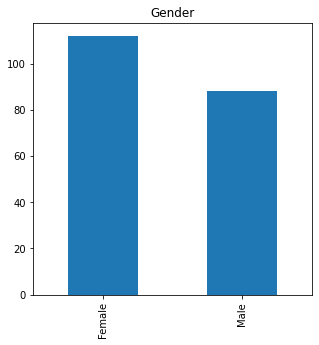

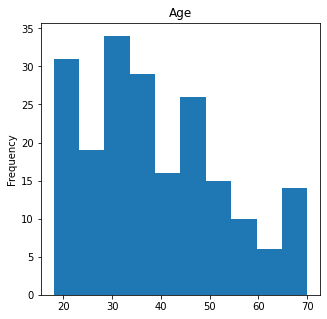

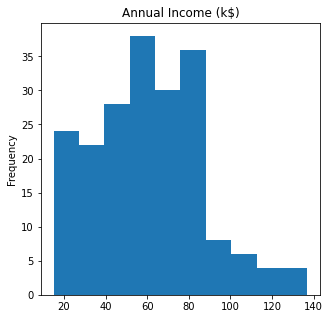

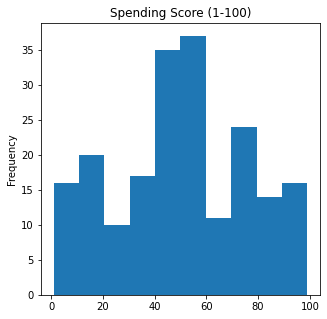

In [81]:
for col in df:
    plt.figure(col, figsize = (5,5))
    plt.title(col)
    if is_numeric_dtype(df[col]):
        df[col].plot(kind='hist')
    elif is_string_dtype(df[col]):
        df[col].value_counts()[:10].plot(kind = 'bar')#Top 10 value count in each categorical data
        

#### Process data

In [82]:
df = pd.get_dummies(df)
df.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Female','Male']
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


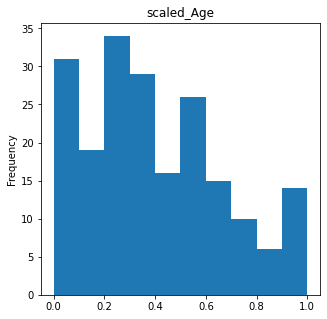

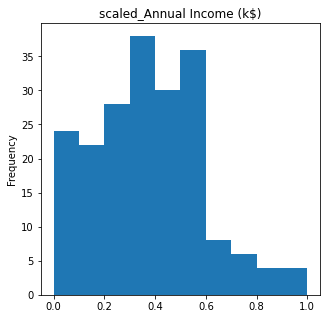

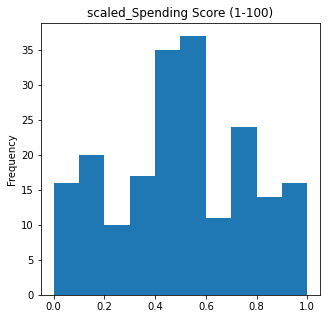

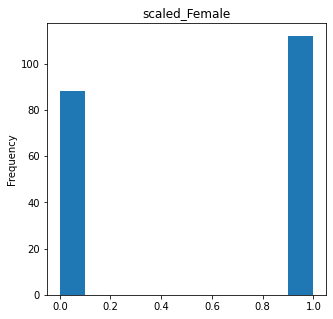

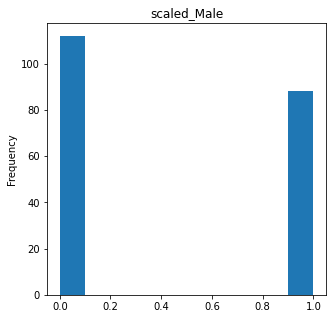

In [83]:
scaler = MinMaxScaler()
for var in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Female','Male']:
    scaled_var = "scaled_" + var
    model = scaler.fit(df[var].values.reshape(-1,1))
    df[scaled_var] =  model.transform(df[var].values.reshape(-1,1))
    plt.figure(figsize=(5,5))
    plt.title(scaled_var)
    df[scaled_var].plot(kind = 'hist')

### Explore 

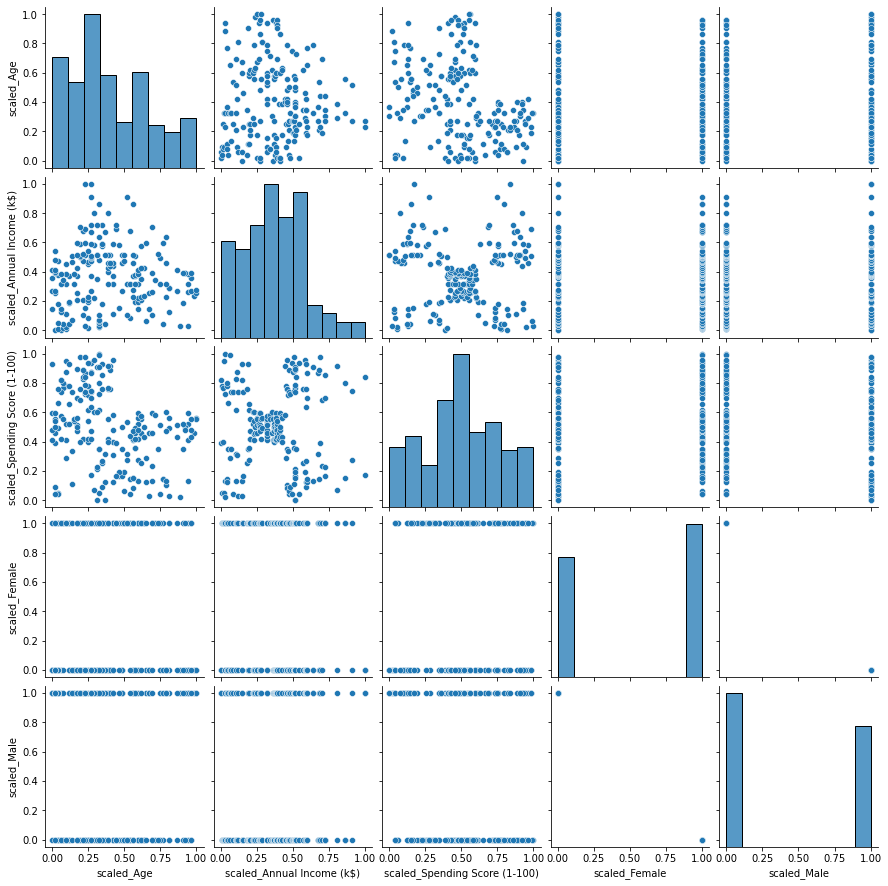

In [84]:
columns =['scaled_Age','scaled_Annual Income (k$)','scaled_Spending Score (1-100)','scaled_Female','scaled_Male']
sns.pairplot(df[columns])

### Kmeans


In [ ]:
#### Initialiser avec une premiere classif hiererchique ensuite parler des différentes méthodes de maj des centroid et des distances